# EDA for BMW Pricing Challenge

Here is a notebook containing the ingestion and analysis of the BMW Pricing Challenge data. Before working on developing and training a predictive model for the prices of BMW vehicles, I will dive into understanding the available data and see what features I could engineer to provide further information.

## Ingest BMW Pricing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './data/bmw_pricing_challenge.csv'
df = pd.read_csv(file_path)

## Quick Summary and Info about the available features and their types

In [3]:
print(df.head())

  maker_key model_key  mileage  engine_power registration_date    fuel  \
0       BMW       118   140411           100        2012-02-01  diesel   
1       BMW        M4    13929           317        2016-04-01  petrol   
2       BMW       320   183297           120        2012-04-01  diesel   
3       BMW       420   128035           135        2014-07-01  diesel   
4       BMW       425    97097           160        2014-12-01  diesel   

  paint_color     car_type  feature_1  feature_2  feature_3  feature_4  \
0       black  convertible       True       True      False      False   
1        grey  convertible       True       True      False      False   
2       white  convertible      False      False      False      False   
3         red  convertible       True       True      False      False   
4      silver  convertible       True       True      False      False   

   feature_5  feature_6  feature_7  feature_8  price     sold_at  
0       True       True       True      Fal

In [4]:
# Display basic information about the dataset
print(df.info())

# Display statistical summary
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


The data set I am playing with to produce a model that predicts the prices of vehicles contains 18 features. **Eight of the features have no documentation**, I will not be exploring them - as our research through Kaggle showed that users found little significance. Also our model is meant to be informative and transparent - I want to make a model that can be understood and explained, so understanding the coefficients is important for interpretability.  

# Exploratory Data Analysis

Here I will be looking at the various features to understand their distributions and find possible underlying relationships in the data.

## Target Variable (Price)

I will start off by looking at the distribution of the `price` variable, and plotting it against some other features to understand its relationship against them.

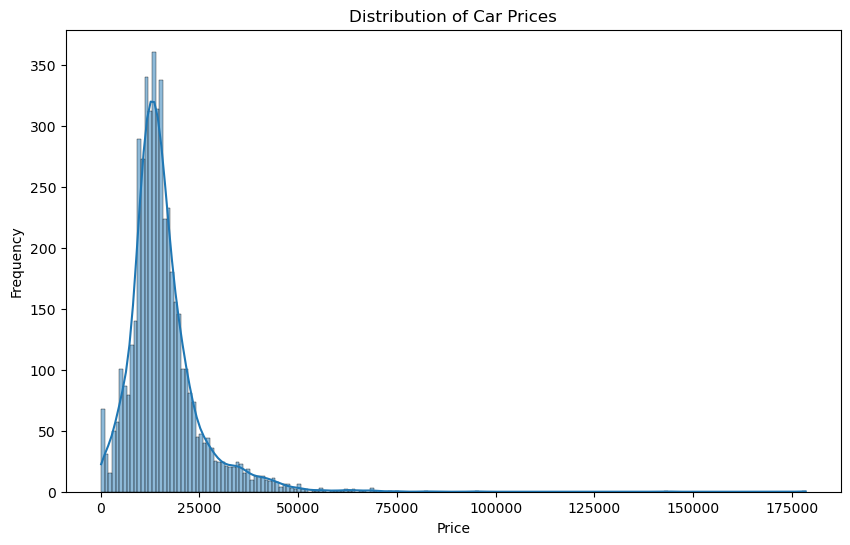

In [5]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

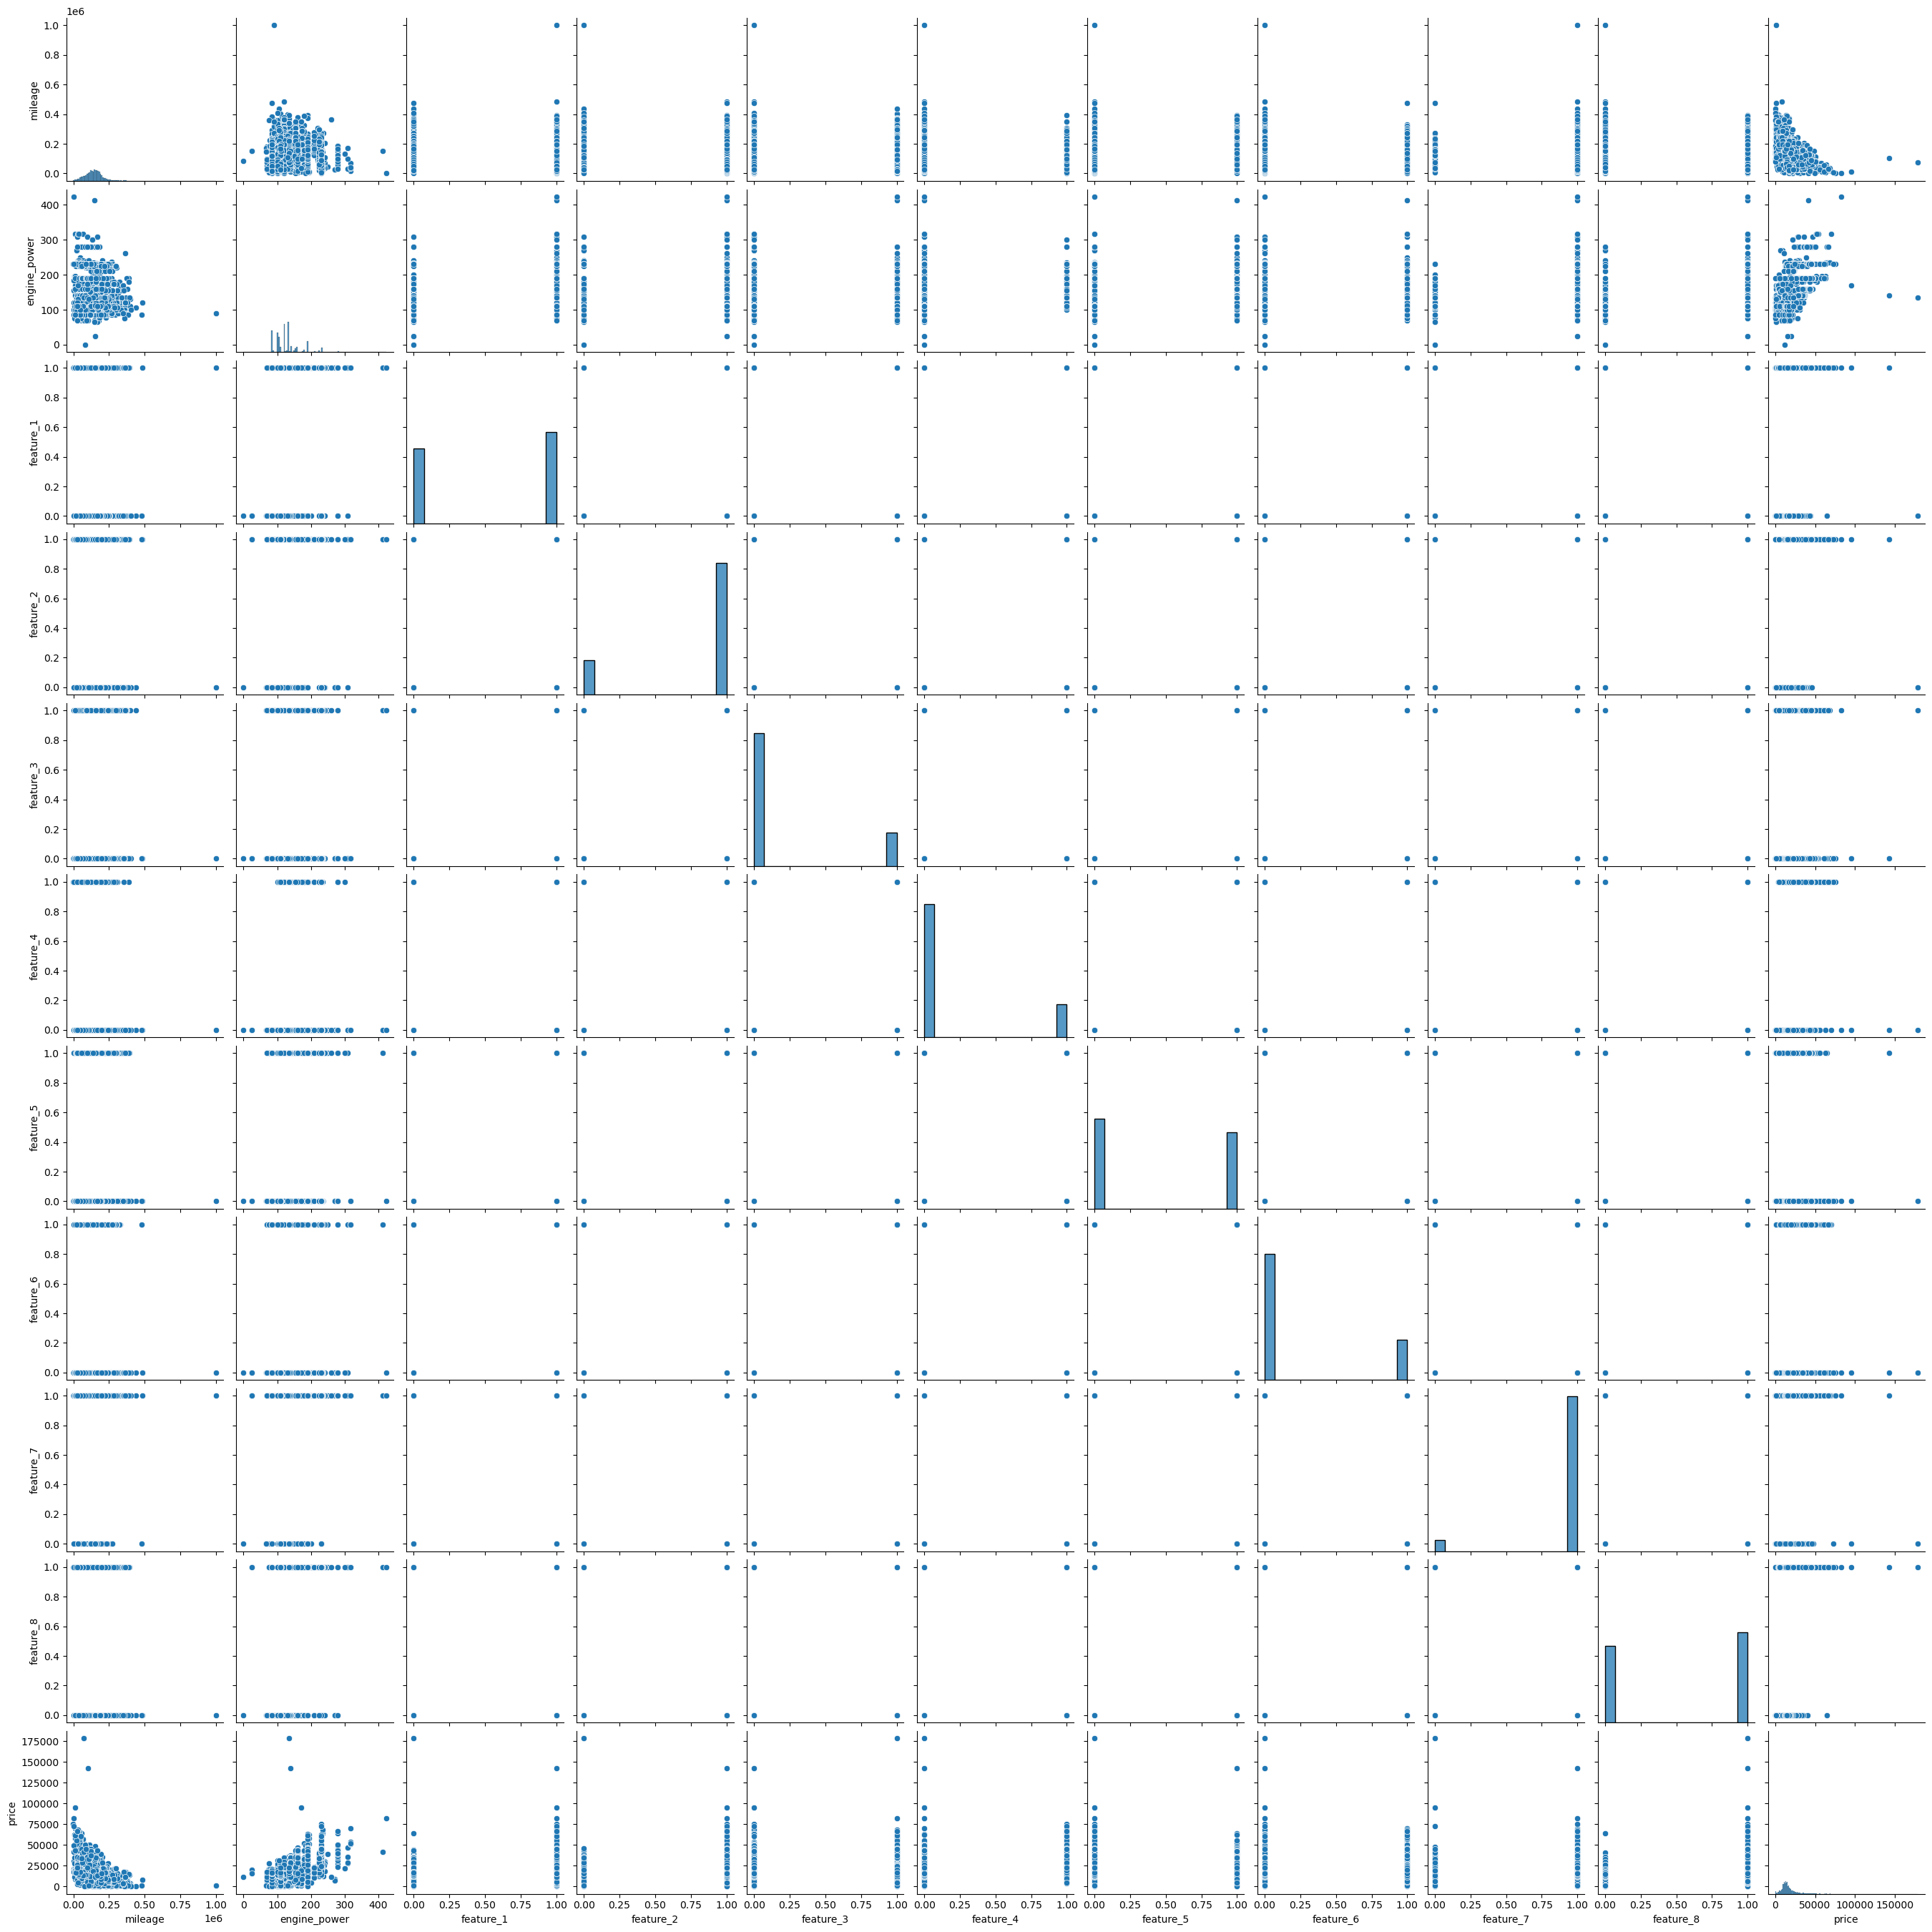

In [6]:
# Plotting pairplot to see relationships
sns.pairplot(df)
plt.show()

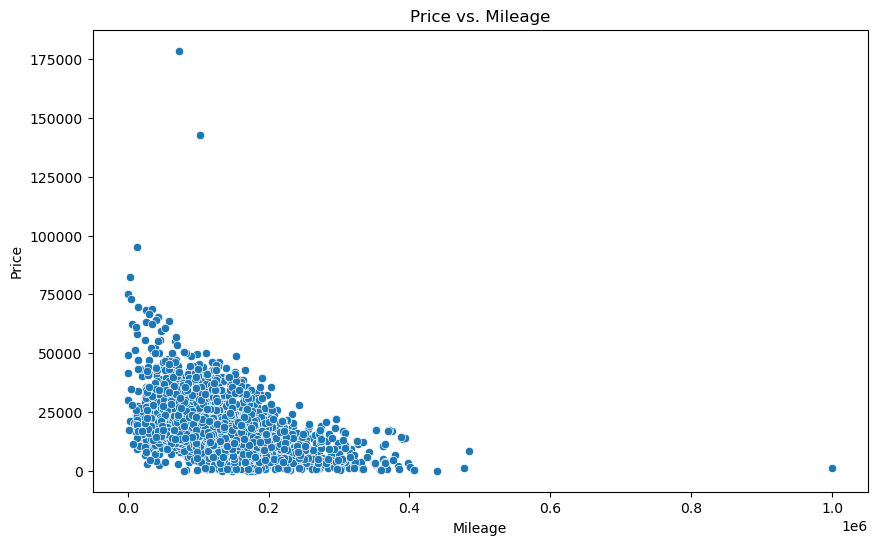

In [7]:
# Scatter plot of price vs. mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Prepare the `sold_at` and `registration_date` variable

Make this variable a date time type, as well as extract just the year of the vehicle.

It is unfortunate that we do not have the age or make of the vehicle in the data set - we are only left with the date of sale, and date of registration. This may mean we need to include some other features from outside sources to get some more date related information, maybe some economic trends.

We will also extract the year the vehicle was sold as well as the year it was registered to understand how these data can effect the price of a BMW.

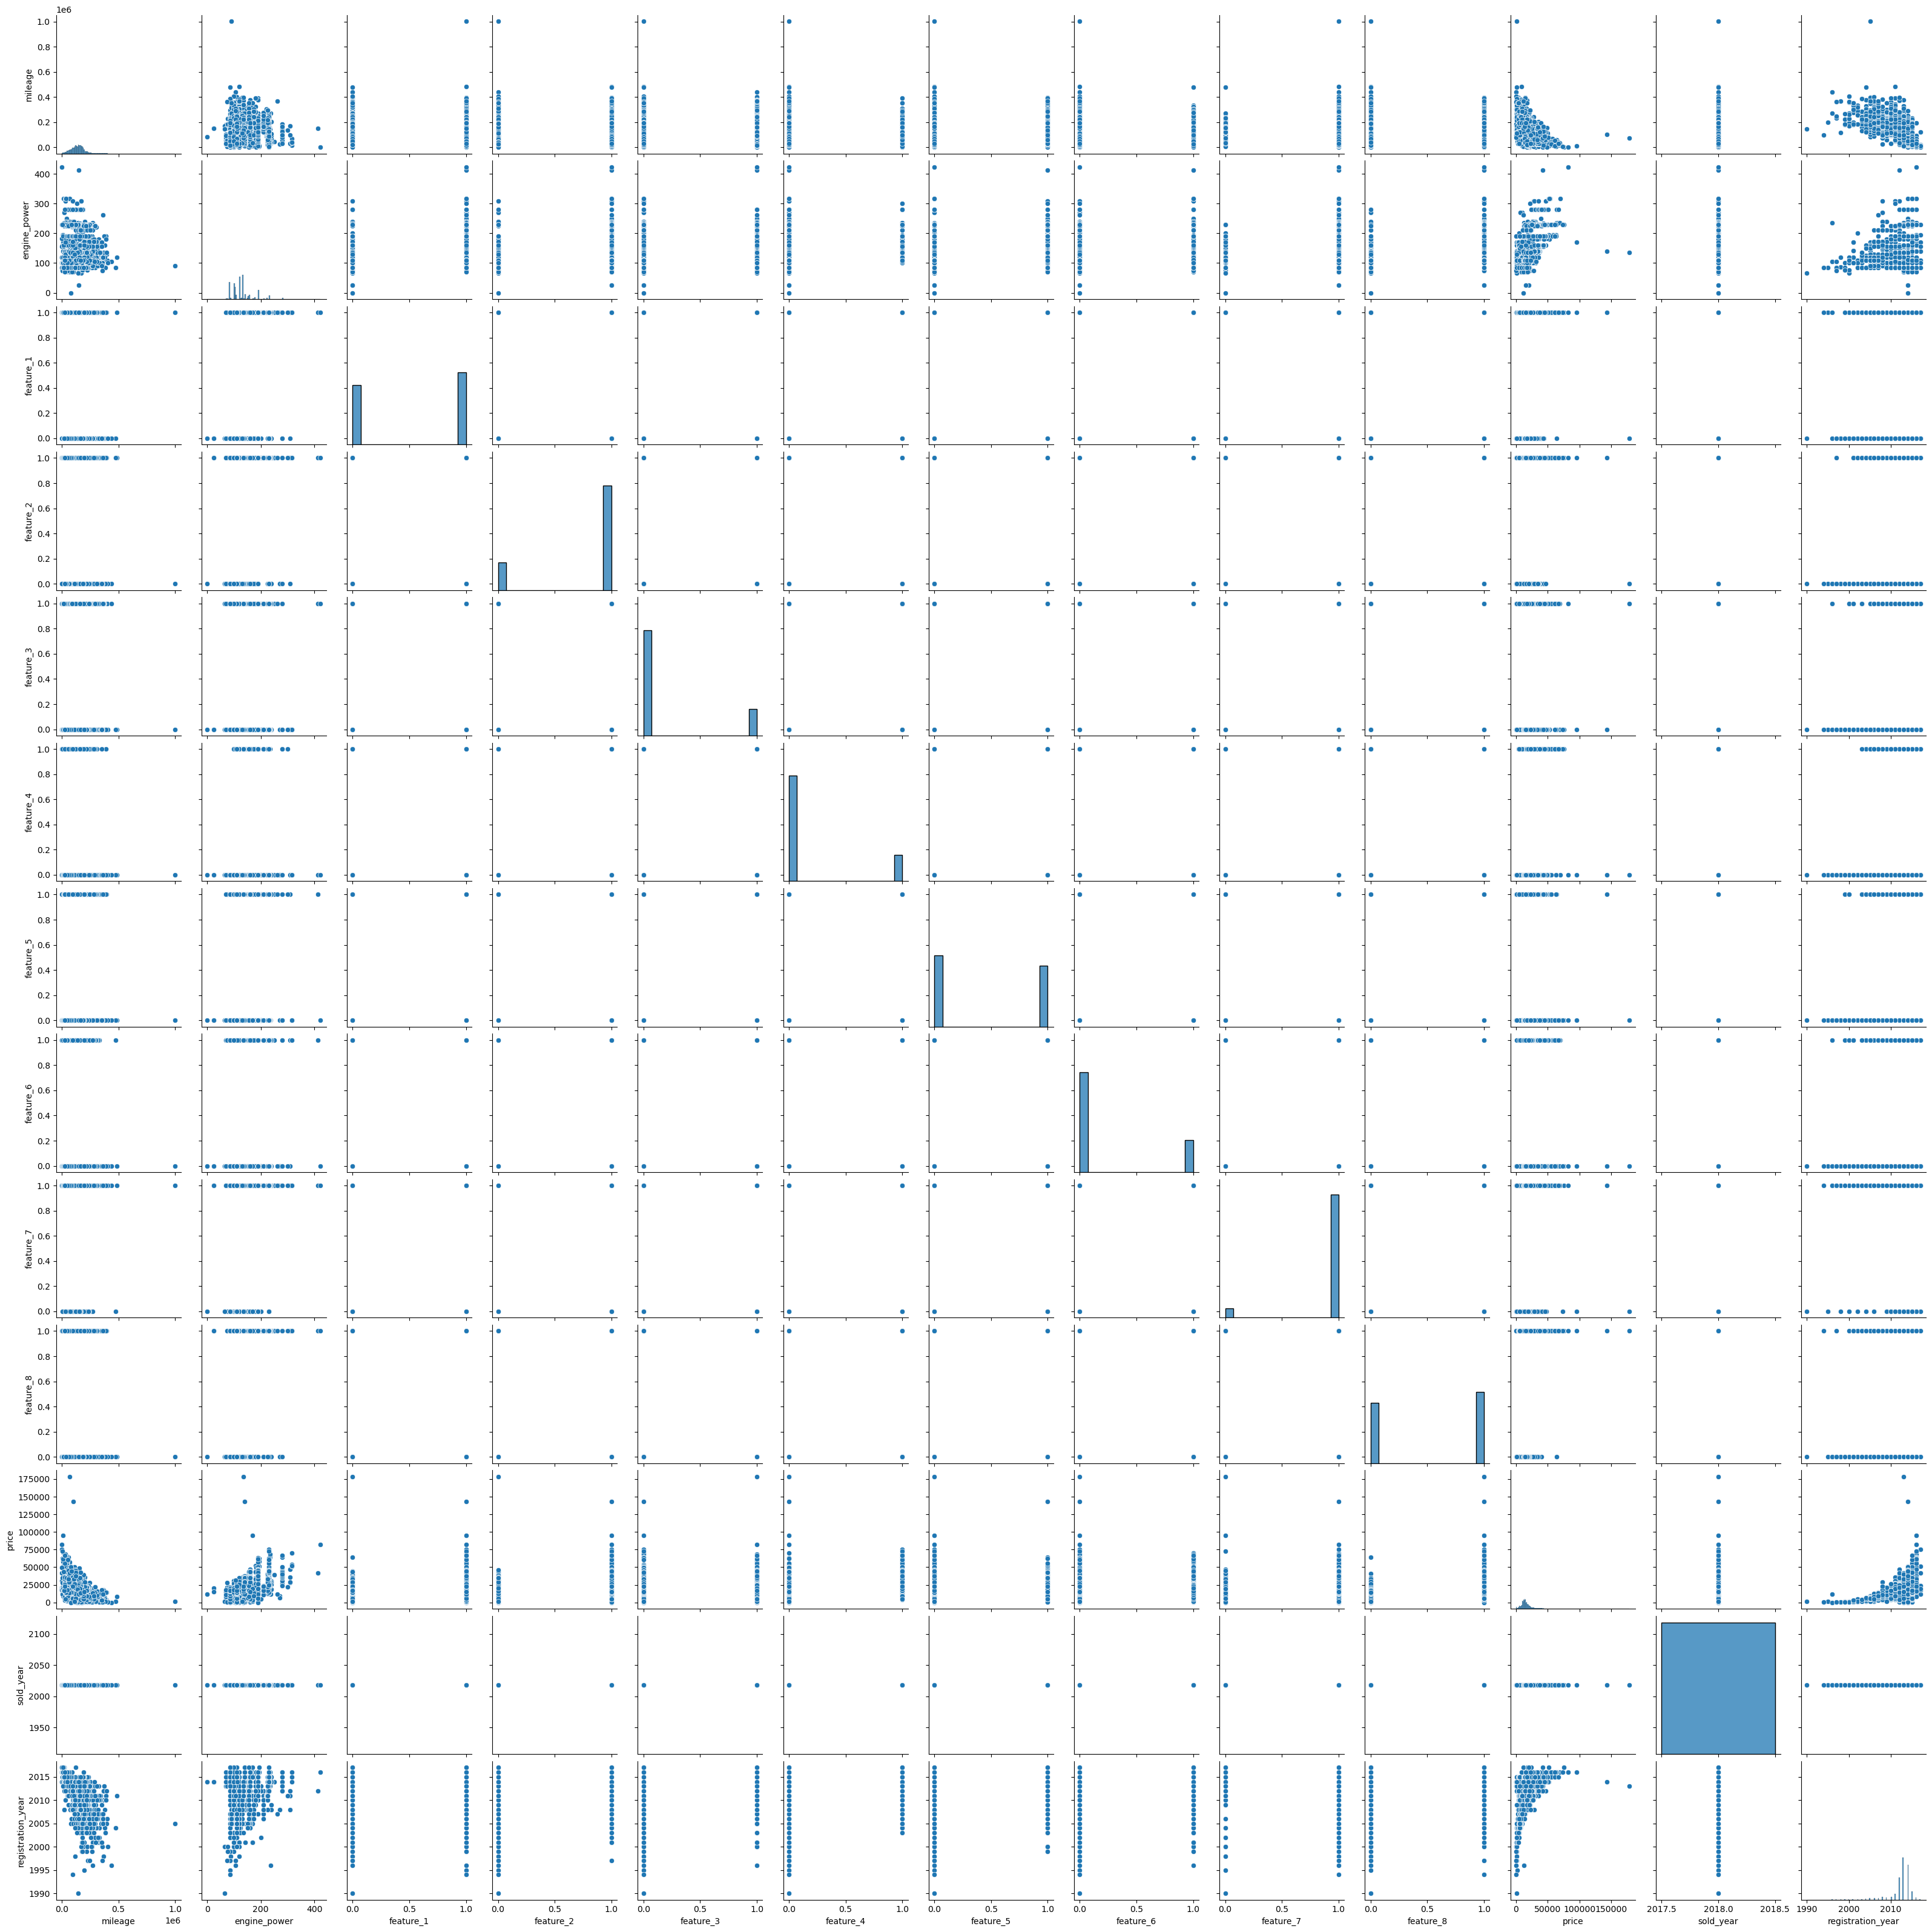

In [8]:
df['sold_at'] = pd.to_datetime(df['sold_at'])
df['sold_year'] = df['sold_at'].dt.year

df['registration_date'] = pd.to_datetime(df['registration_date'])
df['registration_year'] = df['registration_date'].dt.year

sns.pairplot(df)
plt.show()

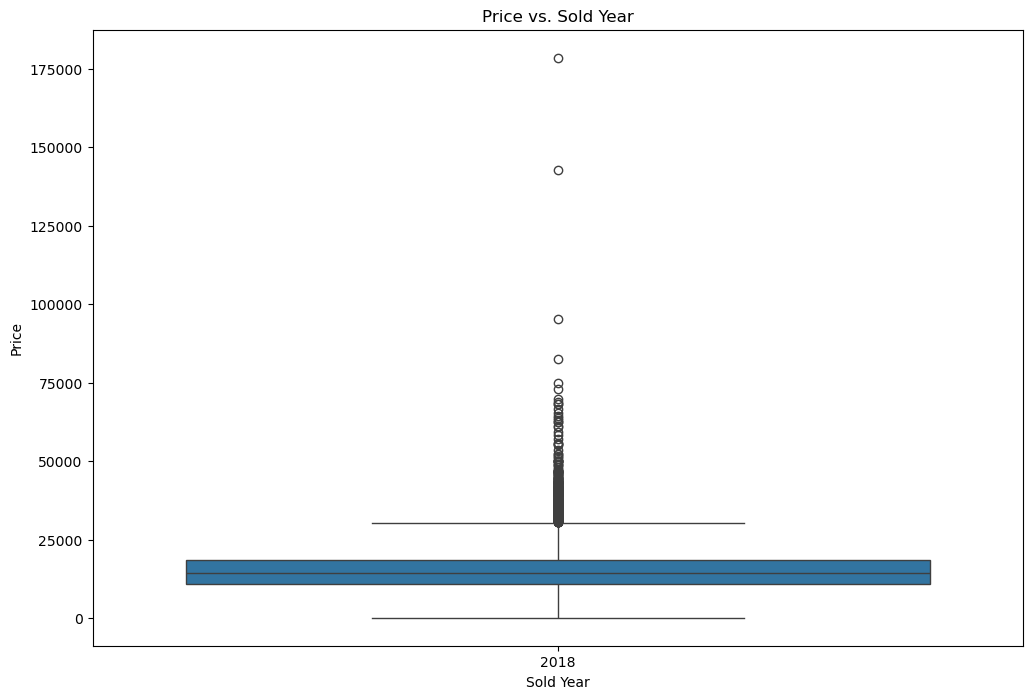

In [9]:
# Box plot of price vs. sold_year
plt.figure(figsize=(12, 8))
sns.boxplot(x='sold_year', y='price', data=df)
plt.title('Price vs. Sold Year')
plt.xlabel('Sold Year')
plt.ylabel('Price')
plt.show()

[2018]


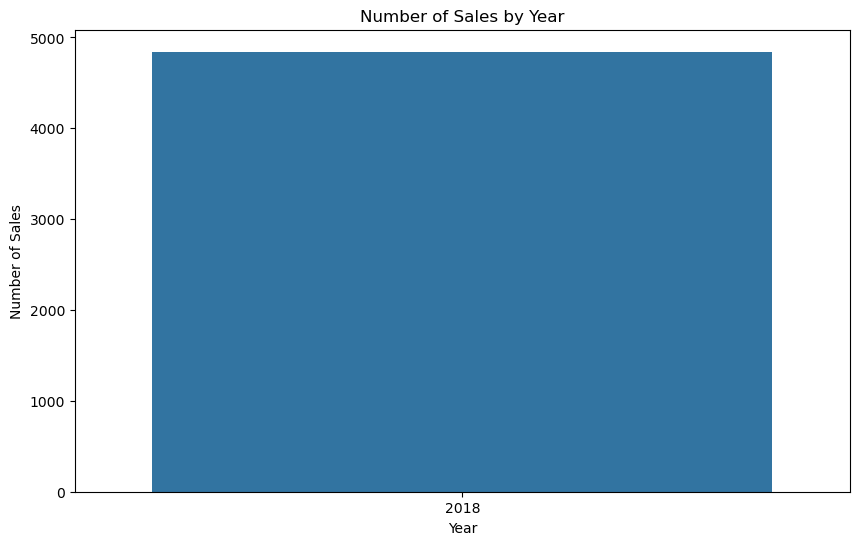

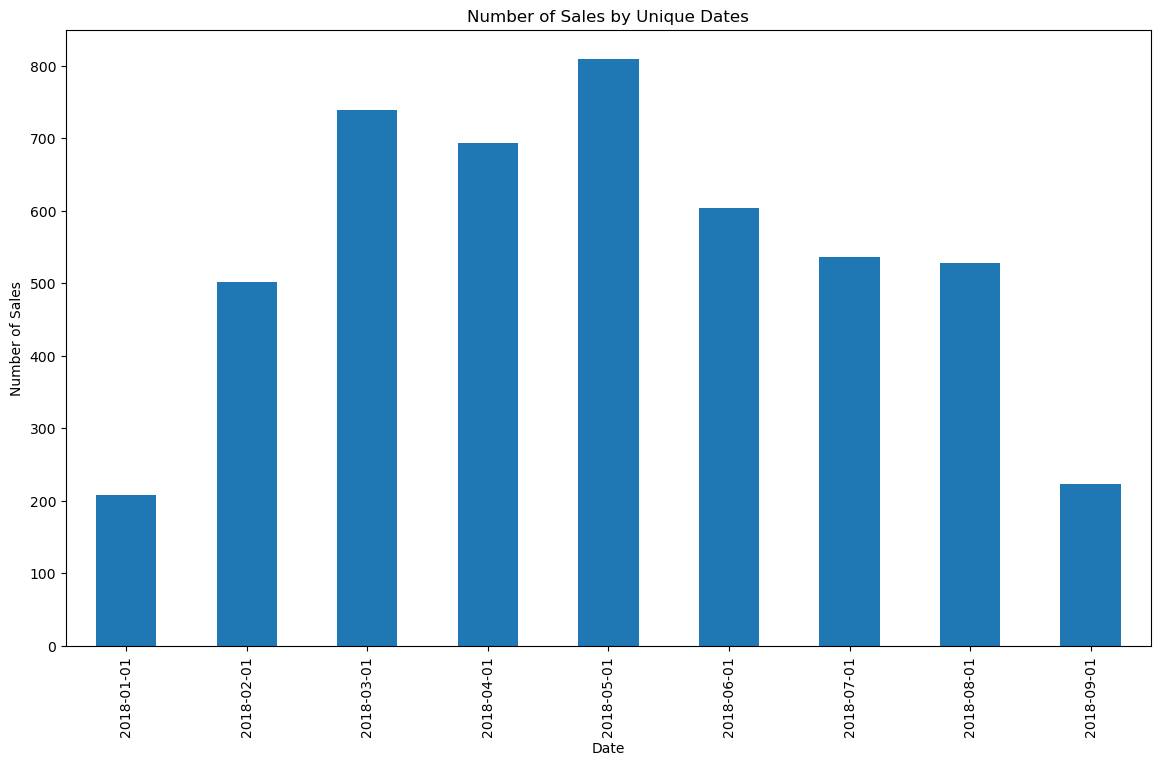

In [10]:
print(df['sold_year'].unique())

# Bar chart for the number of sales by year
plt.figure(figsize=(10, 6))
sns.countplot(x='sold_year', data=df)
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

# Bar chart for the number of sales by unique dates
plt.figure(figsize=(14, 8))
df['sold_date'] = df['sold_at'].dt.date
unique_dates_count = df['sold_date'].value_counts().sort_index()
unique_dates_count.plot(kind='bar')
plt.title('Number of Sales by Unique Dates')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

[2012 2016 2014 2011 2009 2004 2013 2015 2008 1995 2010 2005 2001 1996
 2002 2007 2017 1999 2006 2003 2000 1997 1998 1990 1994]


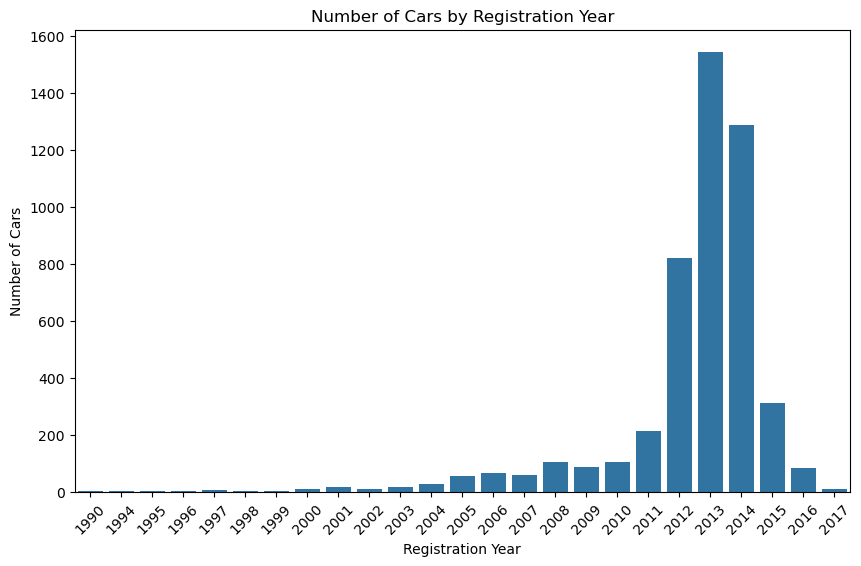

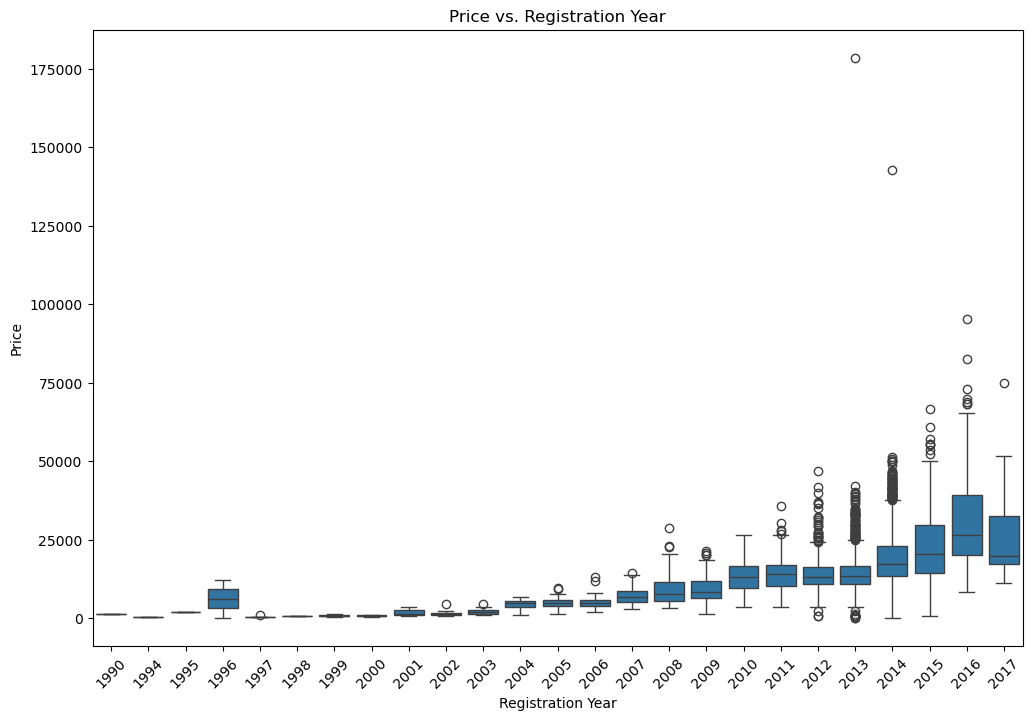

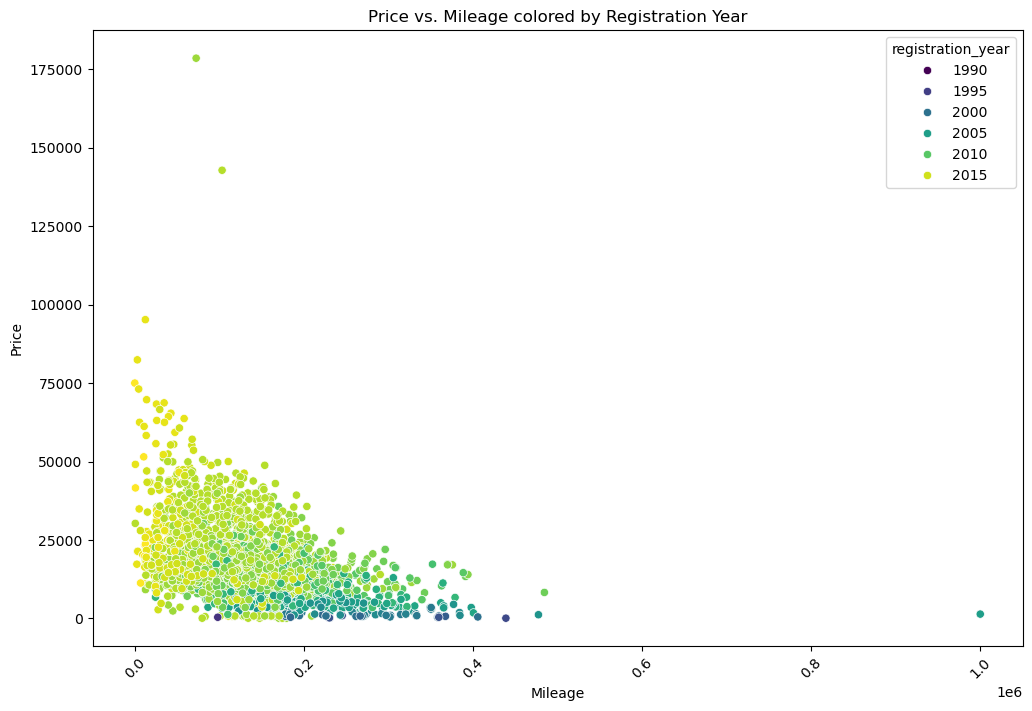

In [12]:
# Display the unique values of the 'registration_year' variable
print(df['registration_year'].unique())

# Bar chart for the number of cars by registration year
plt.figure(figsize=(10, 6))
sns.countplot(x='registration_year', data=df)
plt.title('Number of Cars by Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

# Box plot of price vs. registration_year
plt.figure(figsize=(12, 8))
sns.boxplot(x='registration_year', y='price', data=df)
plt.title('Price vs. Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of price vs. mileage colored by registration year
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mileage', y='price', hue='registration_year', data=df, palette='viridis')
plt.title('Price vs. Mileage colored by Registration Year')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Model Types

Lets now look at the different types of models, and understand which ones are the highest priced.

In [19]:
# Print all the unique models of BMW
unique_models = df['model_key'].unique()
print(f"\nNumber of unique BMW models: {len(unique_models)}\n")

# Calculate the average price and count of each model
model_stats = df.groupby('model_key').agg(avg_price=('price', 'mean'), count=('price', 'size')).reset_index()

print("Average Price and Count of Each BMW Model:")
for index, row in model_stats.iterrows():
    print(f"Model: {row['model_key']}, Average Price: {row['avg_price']:.2f}, Count: {row['count']}")


Number of unique BMW models: 75

Average Price and Count of Each BMW Model:
Model: 114, Average Price: 11206.67, Count: 15
Model: 116, Average Price: 9653.91, Count: 358
Model: 118, Average Price: 9647.55, Count: 143
Model: 120, Average Price: 12416.67, Count: 36
Model: 123, Average Price: 8800.00, Count: 2
Model: 125, Average Price: 12560.00, Count: 5
Model: 135, Average Price: 22350.00, Count: 4
Model: 214 Gran Tourer, Average Price: 17800.00, Count: 1
Model: 216, Average Price: 4800.00, Count: 1
Model: 216 Active Tourer, Average Price: 12700.00, Count: 3
Model: 216 Gran Tourer, Average Price: 17300.00, Count: 4
Model: 218, Average Price: 17715.38, Count: 13
Model: 218 Active Tourer, Average Price: 15400.00, Count: 14
Model: 218 Gran Tourer, Average Price: 15888.89, Count: 9
Model: 220, Average Price: 23800.00, Count: 3
Model: 220 Active Tourer, Average Price: 11700.00, Count: 1
Model: 225, Average Price: 18300.00, Count: 1
Model: 225 Active Tourer, Average Price: 19200.00, Count: 1

# Binning Vehicle Models

The BMW brand is considered a luxury brand. This already introduces a new angle to observe in order to understand the purchase behavior and willingness to pay of 2nd hand buyers. It is also important to understand however that there are various tiers of vehicle offerings at BMW - This led me to bin the vehicle into 3 categories `entry level`, `middle_level`, and `high_end`. These bins were created based off personal experience with the brand as well as looking at various articles and rankings of these models from Gear Patrol and the Elite BMW Ottawa website.

C:\Users\alala\AppData\Local\Temp\ipykernel_41348\2182671584.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='avg_price', data=category_stats, palette='viridis')


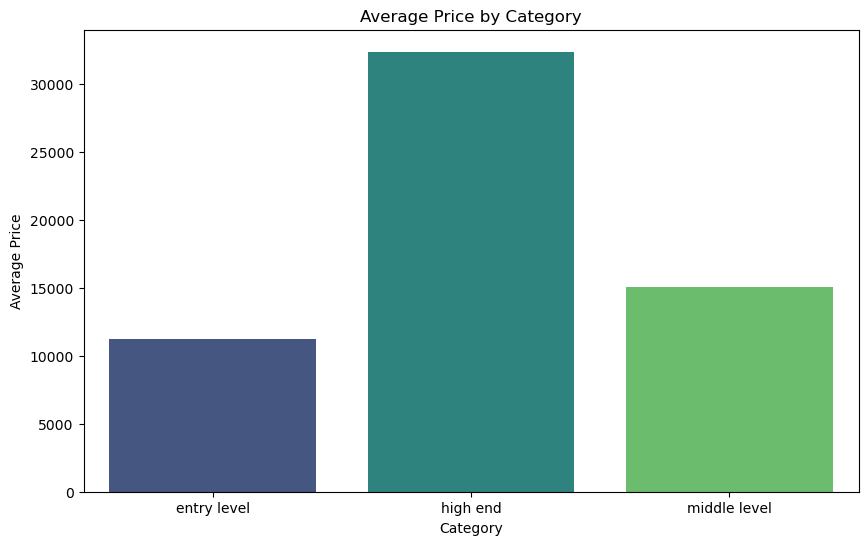

C:\Users\alala\AppData\Local\Temp\ipykernel_41348\2182671584.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='count', data=category_stats, palette='viridis')


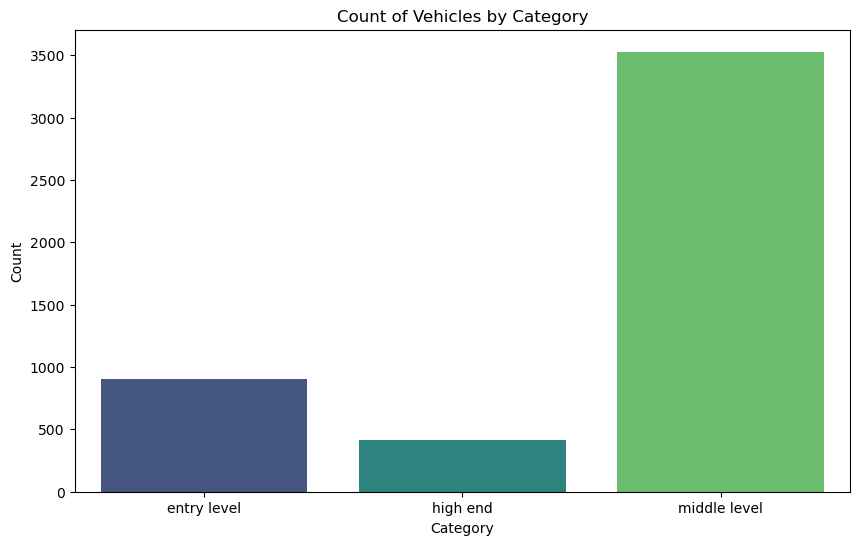

In [22]:
# Function to categorize models
def categorize_model(model):
    entry_level = ['114', '116', '118', '120', '123', '125', '135', '216', '218', '220', '225', 'X1', 'X2', 'i3', 'Z4']
    middle_level = ['316', '318', '320', '325', '328', '330', '335', '418', '420', '425', '430', '435', '518', '520', '523', '525', '528', '530', '535', 'X3', 'X4', 'i4', 'i5']
    high_end = ['630', '635', '640', '650', '730', '735', '740', '750', '8', 'X5', 'X6', 'X7', 'M135', 'M235', 'M3', 'M4', 'M5', 'M550', 'i7', 'i8']
    
    if any(model.startswith(prefix) for prefix in entry_level):
        return 'entry level'
    elif any(model.startswith(prefix) for prefix in middle_level):
        return 'middle level'
    elif any(model.startswith(prefix) for prefix in high_end):
        return 'high end'
    else:
        return 'middle level'  # Default to middle level if not found

# Apply categorization
df['category'] = df['model_key'].apply(categorize_model)

# Calculate average price and count by category
category_stats = df.groupby('category').agg(avg_price=('price', 'mean'), count=('price', 'size')).reset_index()

# Plot average price by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='avg_price', data=category_stats, palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

# Plot count of vehicles by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='count', data=category_stats, palette='viridis')
plt.title('Count of Vehicles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Understanding Body Style and Color

Here we will take a glance to understand how factors such as `car_type` which represents the body style of a vehicle, effect the price of BMW's. We will also see if there are any obvious trends related to `paint_color` to see if there is an effect on price.

In [23]:
# Calculate the average price and count of vehicles based on car_type
car_type_stats = df.groupby('car_type').agg(avg_price=('price', 'mean'), count=('price', 'size')).reset_index()

print("Average Price and Count of Vehicles by Car Type:")
for index, row in car_type_stats.iterrows():
    print(f"Car Type: {row['car_type']}, Average Price: {row['avg_price']:.2f}, Count: {row['count']}")


Average Price and Count of Vehicles by Car Type:
Car Type: convertible, Average Price: 17136.17, Count: 47
Car Type: coupe, Average Price: 22172.12, Count: 104
Car Type: estate, Average Price: 13112.14, Count: 1606
Car Type: hatchback, Average Price: 13289.41, Count: 699
Car Type: sedan, Average Price: 16017.47, Count: 1168
Car Type: subcompact, Average Price: 9521.37, Count: 117
Car Type: suv, Average Price: 21496.12, Count: 1058
Car Type: van, Average Price: 14350.00, Count: 44


In [24]:
# Calculate the average price and count of vehicles based on paint_color
paint_color_stats = df.groupby('paint_color').agg(avg_price=('price', 'mean'), count=('price', 'size')).reset_index()

print("\nAverage Price and Count of Vehicles by Paint Color:")
for index, row in paint_color_stats.iterrows():
    print(f"Paint Color: {row['paint_color']}, Average Price: {row['avg_price']:.2f}, Count: {row['count']}")


Average Price and Count of Vehicles by Paint Color:
Paint Color: beige, Average Price: 15817.07, Count: 41
Paint Color: black, Average Price: 16173.85, Count: 1633
Paint Color: blue, Average Price: 15114.93, Count: 710
Paint Color: brown, Average Price: 15367.74, Count: 341
Paint Color: green, Average Price: 7200.00, Count: 18
Paint Color: grey, Average Price: 15595.74, Count: 1175
Paint Color: orange, Average Price: 18866.67, Count: 6
Paint Color: red, Average Price: 16500.00, Count: 52
Paint Color: silver, Average Price: 14816.11, Count: 329
Paint Color: white, Average Price: 17328.44, Count: 538


C:\Users\alala\AppData\Local\Temp\ipykernel_41348\351825334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='car_type', y='avg_price', data=car_type_stats.sort_values('avg_price', ascending=False), palette='viridis')


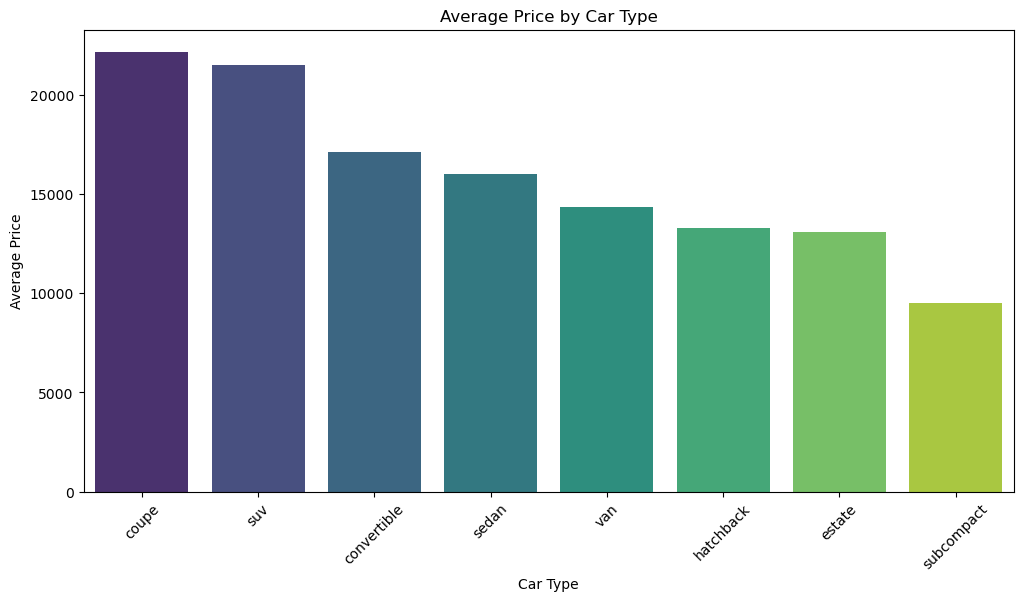

C:\Users\alala\AppData\Local\Temp\ipykernel_41348\351825334.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='car_type', y='count', data=car_type_stats.sort_values('count', ascending=False), palette='viridis')


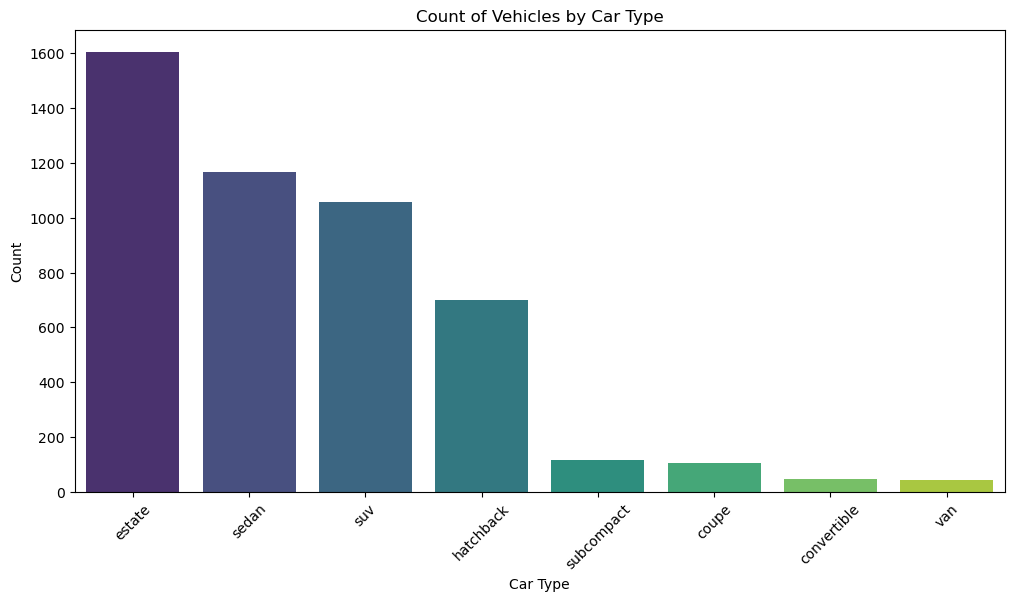

C:\Users\alala\AppData\Local\Temp\ipykernel_41348\351825334.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='paint_color', y='avg_price', data=paint_color_stats.sort_values('avg_price', ascending=False), palette='viridis')


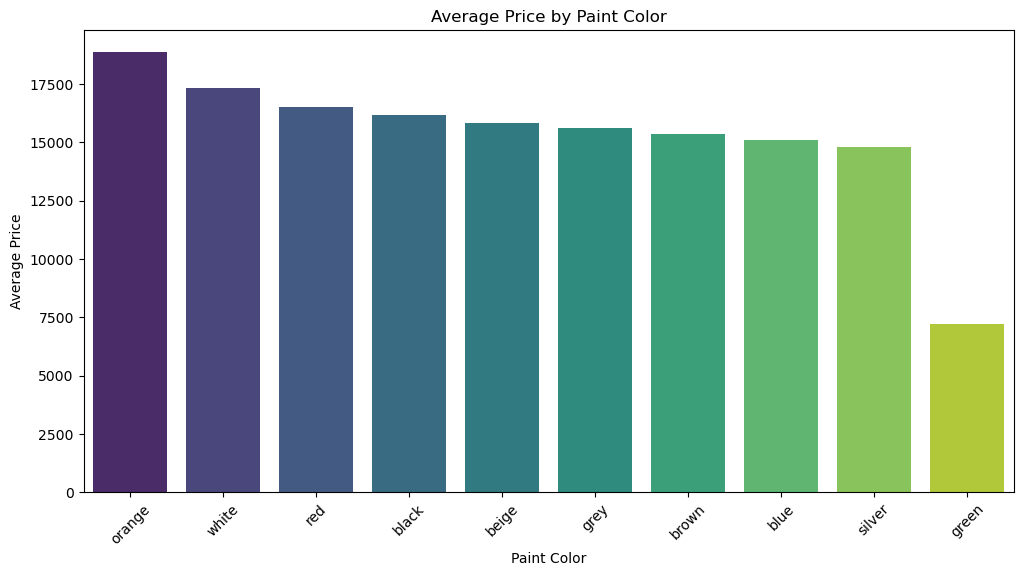

C:\Users\alala\AppData\Local\Temp\ipykernel_41348\351825334.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='paint_color', y='count', data=paint_color_stats.sort_values('count', ascending=False), palette='viridis')


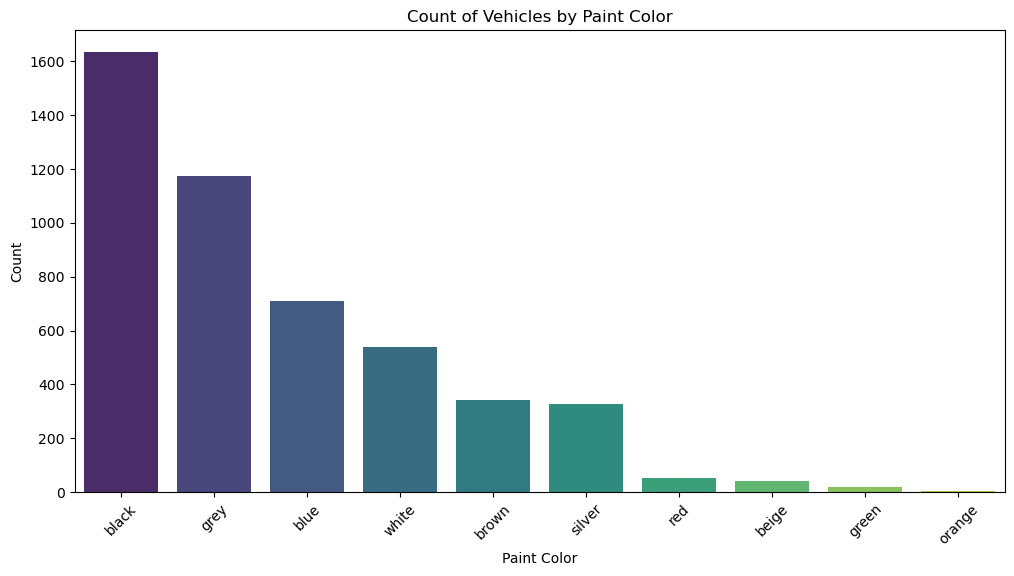

In [26]:
# Plot average price by car type in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x='car_type', y='avg_price', data=car_type_stats.sort_values('avg_price', ascending=False), palette='viridis')
plt.title('Average Price by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Plot count of vehicles by car type in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x='car_type', y='count', data=car_type_stats.sort_values('count', ascending=False), palette='viridis')
plt.title('Count of Vehicles by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot average price by paint color in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x='paint_color', y='avg_price', data=paint_color_stats.sort_values('avg_price', ascending=False), palette='viridis')
plt.title('Average Price by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Plot count of vehicles by paint color in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x='paint_color', y='count', data=paint_color_stats.sort_values('count', ascending=False), palette='viridis')
plt.title('Count of Vehicles by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
